<a href="https://colab.research.google.com/github/valenvergara25/Valentina-Vergara-ModelosPredictivos/blob/main/presentacionFinal/LimpiezaDatosMicroclima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS

## Red Neuronal Microclima

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Cargar el dataset DailyDelhiClimateTrain.csv
dataMicroclima = pd.read_csv('/content/DatasetHomeOffice.csv')
dataMicroclima.head()

,Fecha,Hora,Temperatura,Humedad,CO2,Luminocidad,EstadoCO2,EstadoLuminocidad
0,11/26/2024,6:44:30,21.1,67.1,4095,1613,High,Adequate
1,11/26/2024,6:44:32,21.1,67.2,4095,1535,High,Adequate
2,11/26/2024,6:44:34,21.1,67.2,4095,1578,High,Adequate
3,11/26/2024,6:44:36,21.1,67.2,4095,1559,High,Adequate
4,11/26/2024,6:44:38,21.1,67.2,4095,1568,High,Adequate


In [ ]:
# Verificar las estadísticas generales del dataset
# Revisar la información, encuentre en los datos máximos y mínimos de las variables
# Revisar si encuentra algo fuera de lo normal
dataMicroclima.describe()
#Los valores mínimos y máximos de meanpressure son atipicos, porque tenemos un valor negativo y el maximo es extremadamente alto.
#La desviación estándar de meanpressure es bastante alta, lo que indica una gran dispersion en los datos.

,Temperatura,Humedad,CO2,Luminocidad
count,16332.000000,16332.000000,16332.000000,16332.000000
mean,23.581894,69.166599,2058.047698,2322.220916
std,1.161383,2.736141,1876.233810,626.736229
min,21.100000,62.800000,0.000000,243.000000
25%,22.900000,67.400000,126.750000,1969.000000
50%,23.500000,69.200000,1154.500000,2361.000000
75%,24.700000,71.900000,4095.000000,2768.250000
max,25.300000,74.500000,4095.000000,3674.000000


In [ ]:
# Asegurarse de que 'Fecha' y 'Hora' son cadenas de texto
dataMicroclima['Fecha'] = pd.to_datetime(dataMicroclima['Fecha'], format='%m/%d/%Y')  # Asegúrate de que el formato coincida con tu fecha
dataMicroclima['Hora'] = pd.to_datetime(dataMicroclima['Hora'], format='%H:%M:%S').dt.time  # Convierte a tipo hora

# Unir las columnas 'Fecha' y 'Hora' en una nueva columna 'Fecha_Hora'
dataMicroclima['Fecha_Hora'] = pd.to_datetime(dataMicroclima['Fecha'].astype(str) + ' ' + dataMicroclima['Hora'].astype(str))

# Mostrar el resultado
print(dataMicroclima[['Fecha', 'Hora', 'Fecha_Hora']].head())

       Fecha      Hora          Fecha_Hora
0 2024-11-26  06:44:30 2024-11-26 06:44:30
1 2024-11-26  06:44:32 2024-11-26 06:44:32
2 2024-11-26  06:44:34 2024-11-26 06:44:34
3 2024-11-26  06:44:36 2024-11-26 06:44:36
4 2024-11-26  06:44:38 2024-11-26 06:44:38


In [ ]:
# Reordenar las columnas para que 'Fecha_Hora' quede al principio
cols = ['Fecha_Hora'] + [col for col in dataMicroclima.columns if col != 'Fecha_Hora']
dataMicroclima = dataMicroclima[cols]

In [ ]:
# Eliminar las columnas meantemp, humidity y wind_speed. Mantenga la columna meanpressure
data_aux = dataMicroclima.drop(['EstadoCO2', 'EstadoLuminocidad','Fecha', 'Hora'], axis = 1)
data_aux.head()

,Fecha_Hora,Temperatura,Humedad,CO2,Luminocidad
0,2024-11-26 06:44:30,21.1,67.1,4095,1613
1,2024-11-26 06:44:32,21.1,67.2,4095,1535
2,2024-11-26 06:44:34,21.1,67.2,4095,1578
3,2024-11-26 06:44:36,21.1,67.2,4095,1559
4,2024-11-26 06:44:38,21.1,67.2,4095,1568


In [ ]:
data_aux.isnull().sum()

,0
Fecha_Hora,0
Temperatura,0
Humedad,0
CO2,0
Luminocidad,0


In [ ]:
data_aux.Humedad.unique()

array([67.1, 67.2, 67.3, 67.4, 67.5, 67.6, 67.7, 67.8, 67.9, 68. , 69.5,
       70.7, 71.5, 71.8, 71.9, 72. , 71.7, 71.3, 71. , 70.8, 70.3, 70.2,
       69.9, 69.7, 69.2, 69. , 68.9, 68.8, 68.7, 68.6, 68.5, 68.4, 68.3,
       68.2, 68.1, 69.1, 69.3, 69.4, 69.6, 69.8, 70. , 70.1, 70.4, 70.5,
       70.6, 70.9, 71.1, 71.2, 71.4, 71.6, 72.1, 72.2, 72.3, 72.4, 72.5,
       72.6, 72.7, 72.8, 67. , 66.9, 66.7, 66.8, 66.6, 66.5, 66.4, 66.3,
       66.2, 66.1, 66. , 65.8, 65.9, 65.7, 65.5, 65.6, 65.4, 65.3, 65.2,
       65.1, 65. , 64.9, 64.8, 64.7, 64.6, 64.5, 64.4, 64.3, 64.2, 64.1,
       64. , 63.9, 63.8, 63.7, 63.6, 63.5, 63.4, 63.3, 63.2, 63.1, 63. ,
       62.9, 62.8, 72.9, 73. , 73.1, 73.2, 73.3, 73.4, 73.5, 73.6, 73.7,
       73.8, 73.9, 74. , 74.1, 74.2, 74.3, 74.4, 74.5])

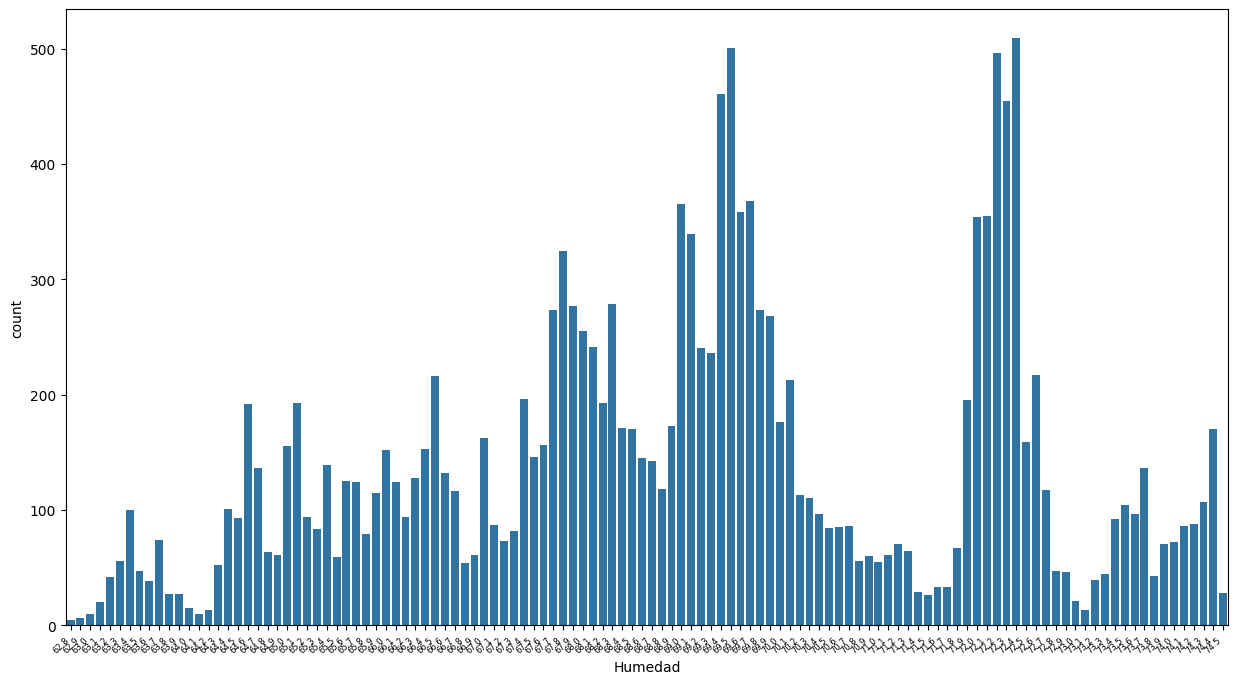

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 8))  # Cambia el tamaño según necesites (ancho, alto)

# Crear el gráfico de conteo
sns.countplot(x='Humedad', data=data_aux)

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=6)  # Rotación y alineación horizontal

# Mostrar la gráfica
plt.show()

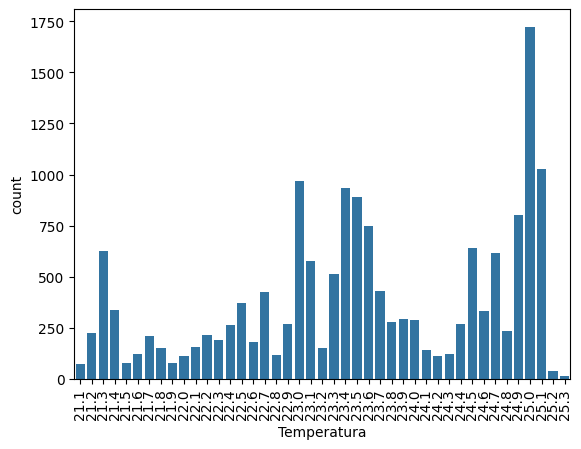

In [ ]:
sns.countplot(x='Temperatura',data=data_aux)
plt.xticks(x=data_aux['Temperatura'], rotation='vertical')
plt.show()

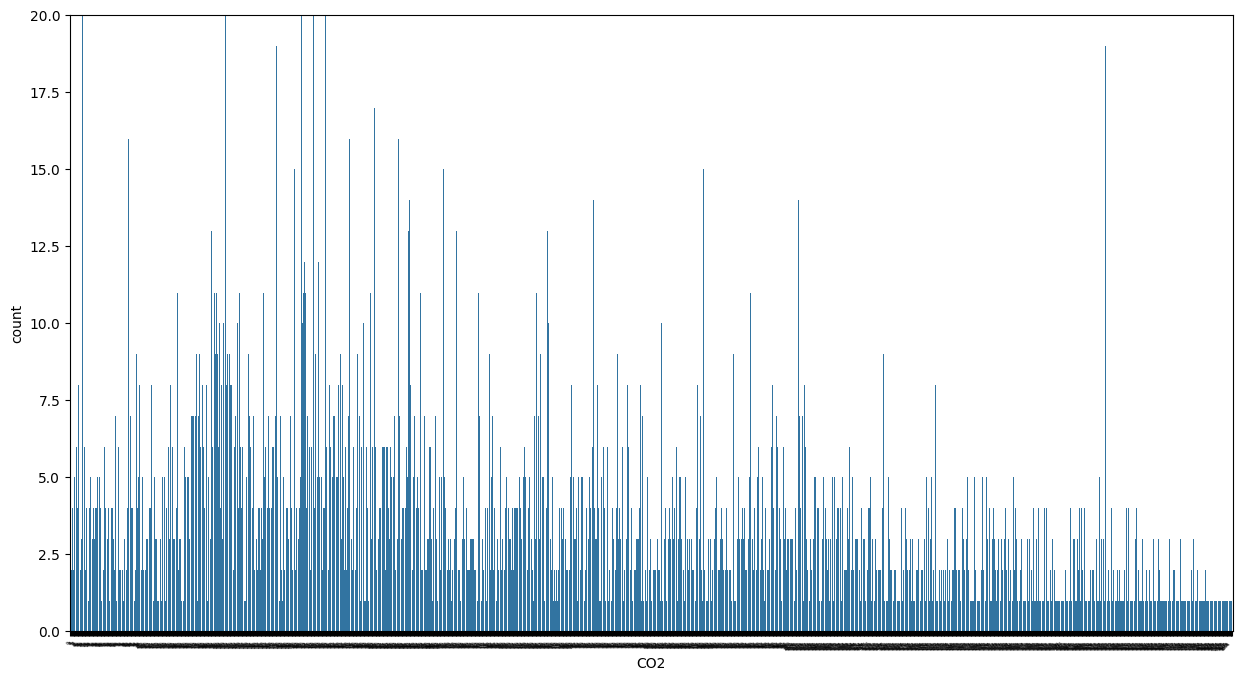

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 8))  # Cambia el tamaño según necesites (ancho, alto)

# Crear el gráfico de conteo
sns.countplot(x='CO2', data=data_aux)

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=3)  # Rotación y alineación horizontal
plt.ylim(0, 20)  # Ajusta el límite superior según tus necesidades

# Mostrar la gráfica
plt.show()

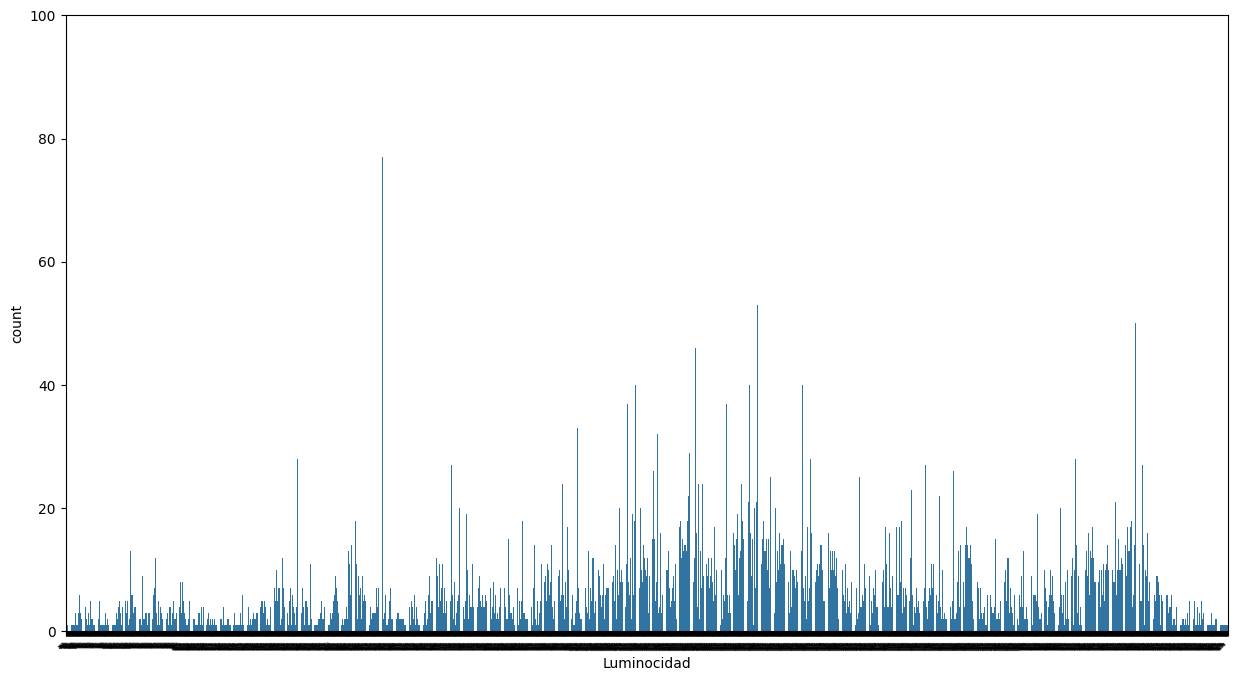

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 8))  # Cambia el tamaño según necesites (ancho, alto)

# Crear el gráfico de conteo
sns.countplot(x='Luminocidad', data=data_aux)

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=3)  # Rotación y alineación horizontal
plt.ylim(0, 100)  # Ajusta el límite superior según tus necesidades

# Mostrar la gráfica
plt.show()

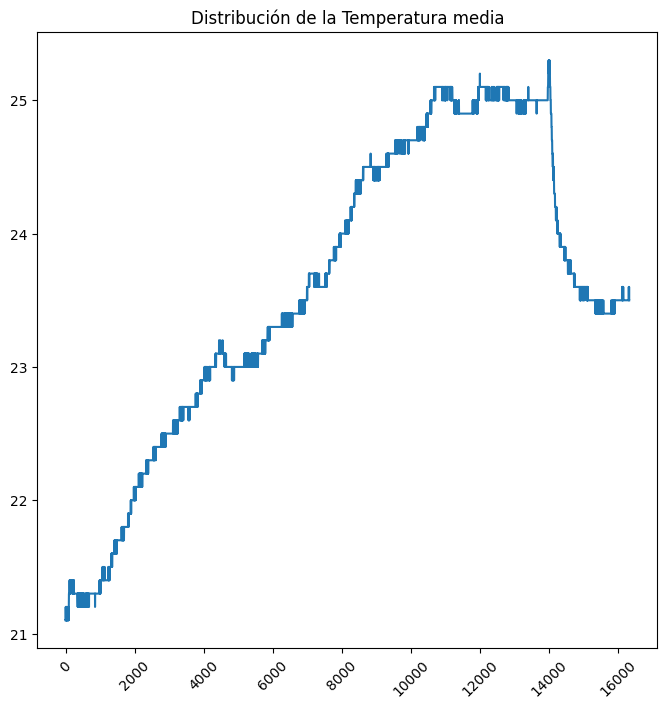

In [ ]:
import matplotlib.dates as mdates
%matplotlib inline

# Graficar los datos del campo Temperatura
plt.figure(figsize=(8, 8))
plt.plot(dataMicroclima['Temperatura'], label='Temperatura')
plt.title('Distribución de la Temperatura media')
plt.xticks(rotation=45)
plt.show()


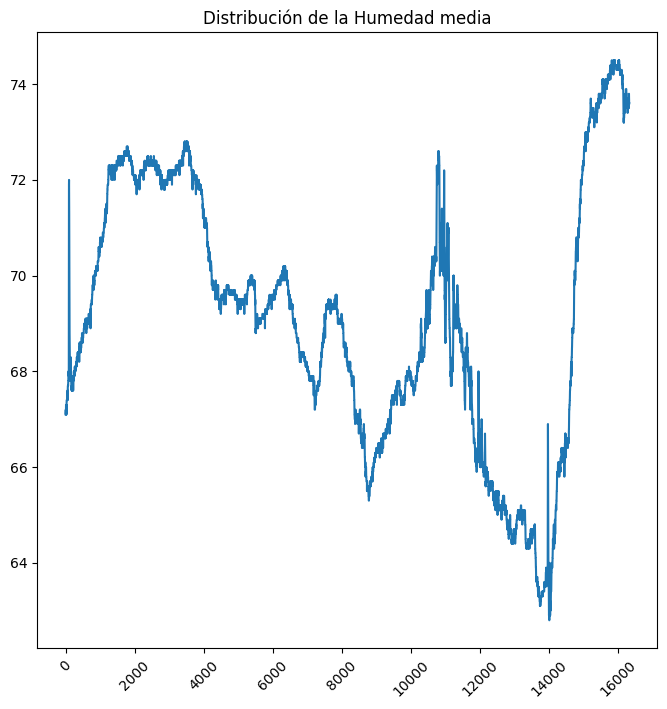

In [ ]:
import matplotlib.dates as mdates
%matplotlib inline

# Graficar los datos del campo Humedad
plt.figure(figsize=(8, 8))
plt.plot(dataMicroclima['Humedad'], label='Humedad')
plt.title('Distribución de la Humedad media')
plt.xticks(rotation=45)
plt.show()

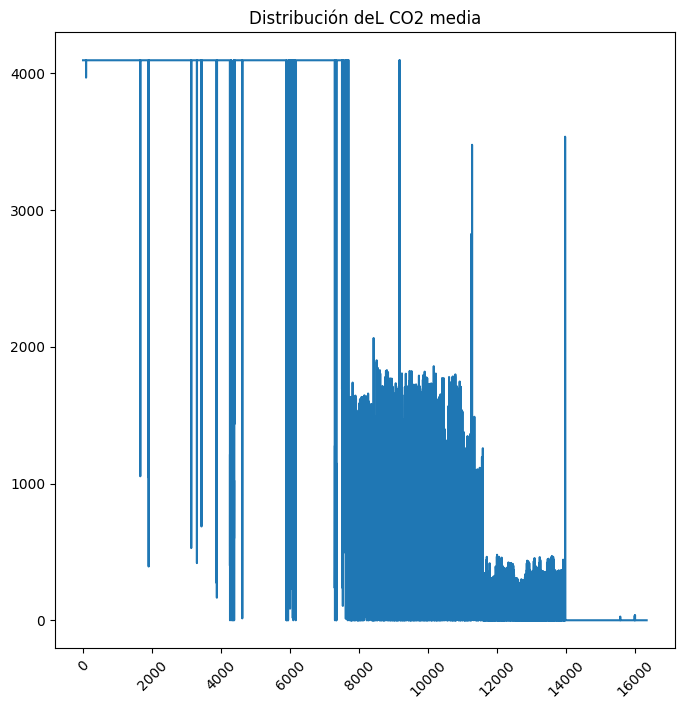

In [ ]:
import matplotlib.dates as mdates
%matplotlib inline

# Graficar los datos del campo CO2
plt.figure(figsize=(8, 8))
plt.plot(dataMicroclima['CO2'], label='CO2')
plt.title('Distribución deL CO2 media')
plt.xticks(rotation=45)
plt.show()

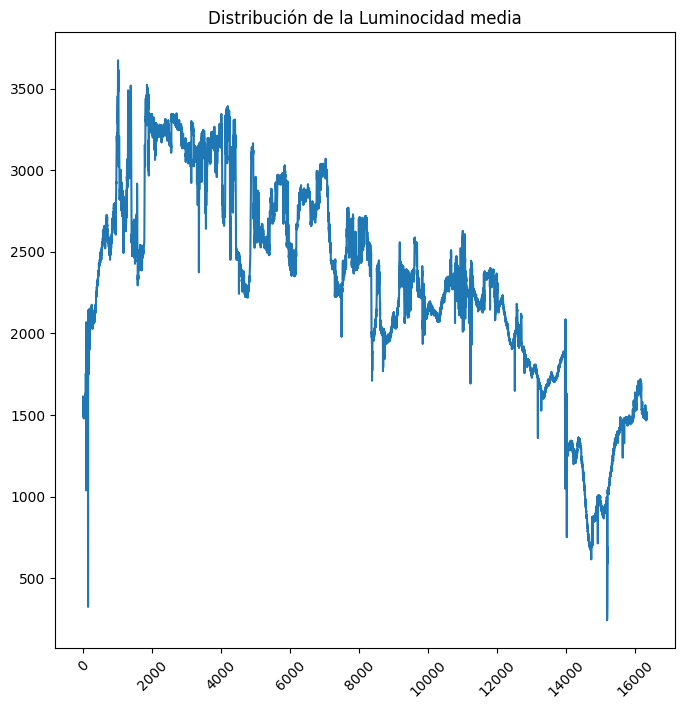

In [ ]:
import matplotlib.dates as mdates
%matplotlib inline

# Graficar los datos del campo CO2
plt.figure(figsize=(8, 8))
plt.plot(dataMicroclima['Luminocidad'], label='Luminocidad')
plt.title('Distribución de la Luminocidad media')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Temperatura'>

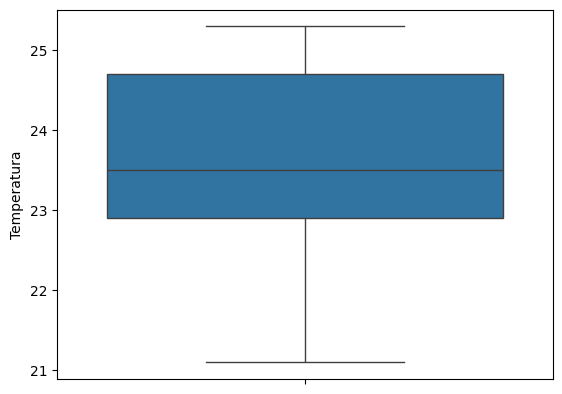

In [ ]:
# Determinar visualmente si hay outliers
sns.boxplot(data = dataMicroclima['Temperatura']) #Verificar datos atipicos o no

<Axes: ylabel='Humedad'>

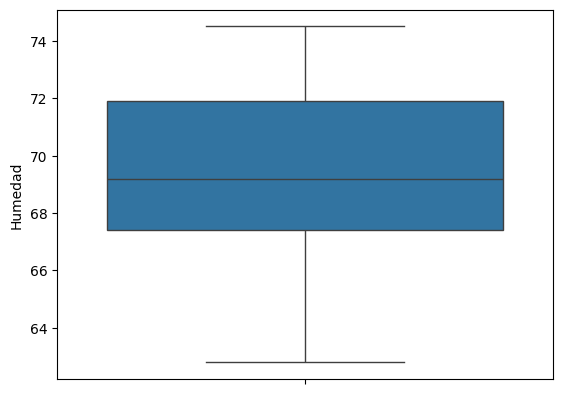

In [ ]:
# Determinar visualmente si hay outliers
sns.boxplot(data = dataMicroclima['Humedad']) #Verificar datos atipicos o no

<Axes: ylabel='CO2'>

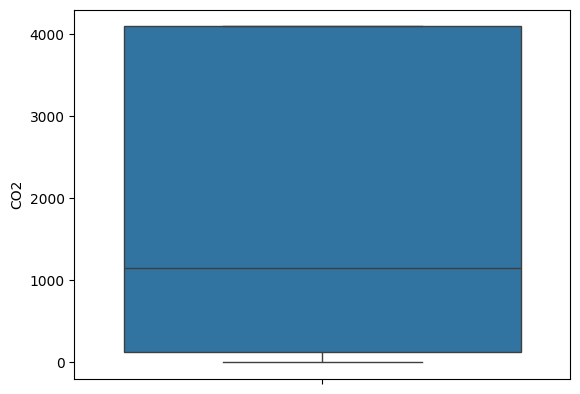

In [ ]:
# Determinar visualmente si hay outliers
sns.boxplot(data = dataMicroclima['CO2']) #Verificar datos atipicos o no

<Axes: ylabel='Luminocidad'>

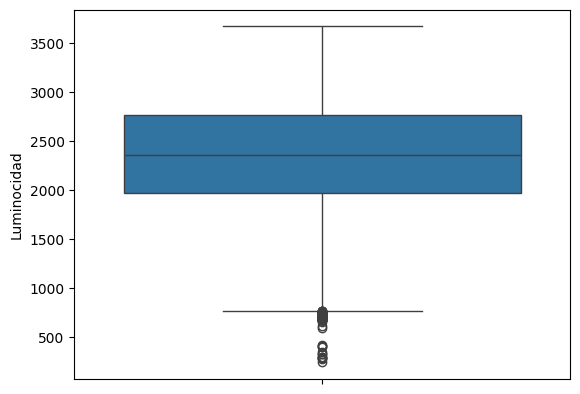

In [ ]:
# Determinar visualmente si hay outliers
sns.boxplot(data = dataMicroclima['Luminocidad']) #Verificar datos atipicos o no

In [ ]:
# Calcular el parámetro Zscore para la columna meanpressure
Zscore = np.abs(stats.zscore(dataMicroclima.loc[:, ['Luminocidad']]))
index, flag = np.where(Zscore > 3)
print(index)
print(flag)

[  144   146 15185 15186 15187 15188 15189 15190 15191 15192 15193 15194
 15195]
[0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Variar el valor del humbral de Zscore para filtrar valores atípicos hasta que considere que la gráfica de la variable
#  meanpressure sea correcta
Zscore = np.abs(stats.zscore(dataMicroclima.loc[:, ['Luminocidad']]))
index, flag = np.where(Zscore > 0.1)
print(index)
print(flag)

[    0     1     2 ... 16329 16330 16331]
[0 0 0 ... 0 0 0]


In [ ]:
dataCopy = dataMicroclima.copy(deep = True)
dataCopy.head() #Copia profunda

,Fecha_Hora,Fecha,Hora,Temperatura,Humedad,CO2,Luminocidad,EstadoCO2,EstadoLuminocidad
0,2024-11-26 06:44:30,2024-11-26,06:44:30,21.1,67.1,4095,1613,High,Adequate
1,2024-11-26 06:44:32,2024-11-26,06:44:32,21.1,67.2,4095,1535,High,Adequate
2,2024-11-26 06:44:34,2024-11-26,06:44:34,21.1,67.2,4095,1578,High,Adequate
3,2024-11-26 06:44:36,2024-11-26,06:44:36,21.1,67.2,4095,1559,High,Adequate
4,2024-11-26 06:44:38,2024-11-26,06:44:38,21.1,67.2,4095,1568,High,Adequate


In [ ]:
# Eliminar los valores atípicos
dataMicroclima_clean = dataMicroclima[(Zscore < 0.1).all(axis=1)]

In [ ]:
# Para los datos sin outliers verificar nuevamente las estadísticas generales
# Qué puede decir de los valores máximos y mínimos de los datos filtrados
dataMicroclima_clean.describe()
#Los valores mínimos y máximos de meanpressure se encuentran regulados, ya no tenemos ningun valor negativo.
#La desviación estándar de meanpressure se encuentra entre los valores correctos en relacion con las demas columnas, lo que indica una correlacion en el proceso.


,Fecha_Hora,Fecha,Temperatura,Humedad,CO2,Luminocidad
count,1666,1666,1666.000000,1666.000000,1666.000000,1666.000000
mean,2024-11-26 11:43:59.788115200,2024-11-26 00:00:00,24.297179,68.701981,1423.840936,2329.284514
min,2024-11-26 06:57:51,2024-11-26 00:00:00,21.200000,65.900000,0.000000,2260.000000
25%,2024-11-26 10:51:22.500000,2024-11-26 00:00:00,23.600000,67.500000,293.000000,2297.000000
50%,2024-11-26 12:12:50,2024-11-26 00:00:00,24.700000,68.600000,825.500000,2335.000000
75%,2024-11-26 12:55:27.500000,2024-11-26 00:00:00,25.000000,69.700000,1661.000000,2363.000000
max,2024-11-26 13:26:20,2024-11-26 00:00:00,25.100000,72.600000,4095.000000,2384.000000
std,NaN,NaN,0.976485,1.515898,1539.584424,38.106009


<Axes: ylabel='Luminocidad'>

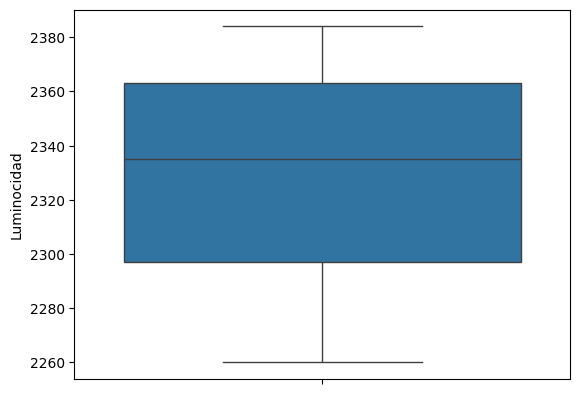

In [ ]:
# Realice un diagrama de cajas y alambres para determinar visualmente si aún hay outliers
sns.boxplot(data = dataMicroclima_clean['Luminocidad']) #Aun se encuentran dos datos atipicos

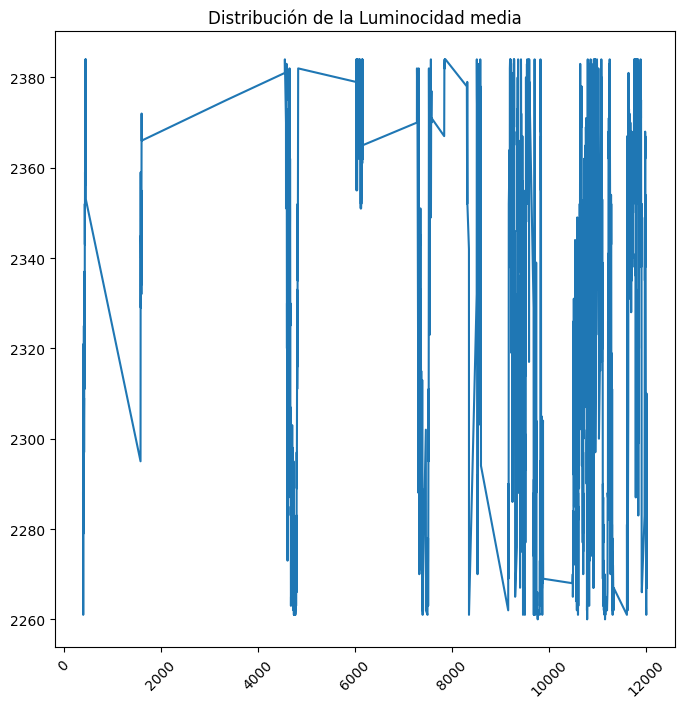

In [ ]:
#Graficar nuevamente los datos
plt.figure(figsize=(8, 8))
plt.plot(dataMicroclima_clean['Luminocidad'], label='Luminocidad')
plt.title('Distribución de la Luminocidad media')
plt.xticks(rotation=45)
plt.show()

Bosques Aleatorios

---



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Assuming dataMicroclima is your pandas DataFrame

# Convert the 'Timestamp' column to numerical representation
#  Replace 'YourTimestampColumn' with the actual name of your timestamp column
# If the problem is in 'dataMicroclima' the changes should happen before the split.
for column in dataMicroclima.select_dtypes(include=['datetime', 'datetime64', 'timedelta', 'timedelta64']).columns:
    dataMicroclima[column] = dataMicroclima[column].view('int64') // 10**9

# Convert datetime.time objects to numerical format
for column in dataMicroclima.select_dtypes(include=['object']).columns:
    try:
        dataMicroclima[column] = pd.to_numeric(dataMicroclima[column].astype(str).str.replace(':', ''))
    except ValueError:
        # Handle columns that cannot be converted to numeric using Label Encoding
        le = LabelEncoder()
        dataMicroclima[column] = le.fit_transform(dataMicroclima[column])

x = dataMicroclima.drop(['Temperatura'],axis=1)
y = dataMicroclima['Temperatura']

x = np.asarray(x)
y = np.asarray(y)
print(x.shape, y.shape)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

# Change to RandomForestRegressor for continuous target
RF_model = RandomForestRegressor(n_estimators=19, random_state=45, min_samples_leaf = 8)

RF_model.fit(xtrain, ytrain) # Now this line should work without the ValueError

(16332, 8) (16332,)
(13065, 8) (13065,) (3267, 8) (3267,)


RandomForestRegressor(min_samples_leaf=8, n_estimators=19, random_state=45)

Mean Squared Error: 0.0007201295489793291
R-squared: 0.9994554541564297


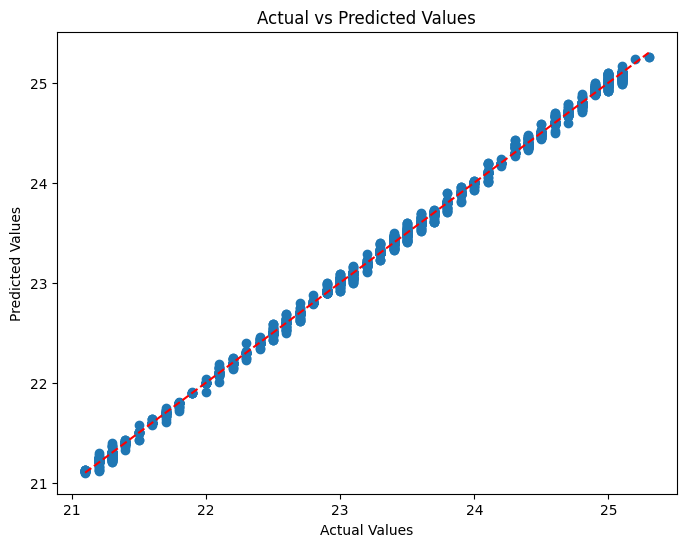

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#Import necessary functions from sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score

ypred = RF_model.predict(xtest)

# Calculate regression metrics
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red')  # Add a diagonal line
plt.show()



---



Regresión Logistica


---



In [ ]:
from sklearn.linear_model import LinearRegression

# Change to Linear Regression for continuous target variable
linear_model = LinearRegression()

# Fit the model
linear_model.fit(xtrain, ytrain)


LinearRegression()

Mean Squared Error: 0.13599420322048253
R-squared: 0.8971642279943423


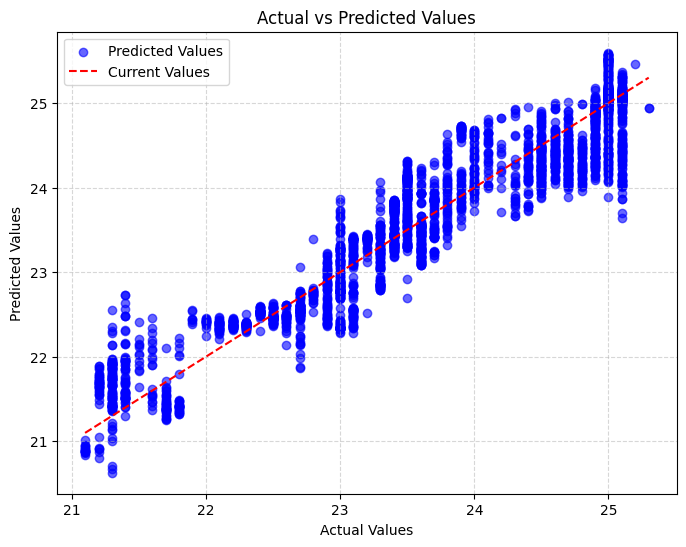

In [ ]:
# Predict on your test data
ypred = linear_model.predict(xtest)

# Now you can evaluate the model using regression metrics like MSE, R-squared, etc.
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualización con colores diferentes
plt.figure(figsize=(8, 6))

# Puntos para valores actuales vs predichos
plt.scatter(ytest, ypred, color='blue', label='Predicted Values', alpha=0.6)

# Línea de identidad (actual = predicho) para referencia
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--', label='Current Values')

# Etiquetas y leyenda
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()  # Muestra la leyenda
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar gráfica
plt.show()

Matriz de Confusión

---



In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.asarray(ytrain).reshape(-1,1))

y_train = enc.transform(np.asarray(ytrain).reshape(-1,1)).toarray()
y_test = enc.transform(np.asarray(ytest).reshape(-1,1)).toarray()

y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, input_shape= (xtrain.shape[1],), activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(2, activation='softmax'))

model.summary()
#El total son los W -> y genera un Hiperplano

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,962 (503.76 KB)

 Trainable params: 128,962 (503.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain, y_train, epochs=10, batch_size=32, verbose = 1, validation_split=0.1)

Epoch 1/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9483 - loss: 1119083.7500 - val_accuracy: 0.9763 - val_loss: 19335.9102
Epoch 2/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9648 - loss: 25013.9570 - val_accuracy: 0.9763 - val_loss: 0.1325
Epoch 3/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9690 - loss: 8877.3750 - val_accuracy: 0.9763 - val_loss: 0.1140
Epoch 4/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9736 - loss: 1682.5568 - val_accuracy: 0.9763 - val_loss: 0.1123
Epoch 5/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9722 - loss: 3837.4753 - val_accuracy: 0.9763 - val_loss: 0.1122
Epoch 6/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9772 - loss: 502.7600 - val_accuracy: 0.9763 - val_loss: 0.1122
Epoch 7/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9756 - loss: 170.6660 - val_accuracy: 0.9763 - val_loss: 0.1122
Epoch 8/10
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9758 - loss

In [ ]:
model.save('modelRedN.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('modelRedN.h5')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,964 (503.77 KB)

 Trainable params: 128,962 (503.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

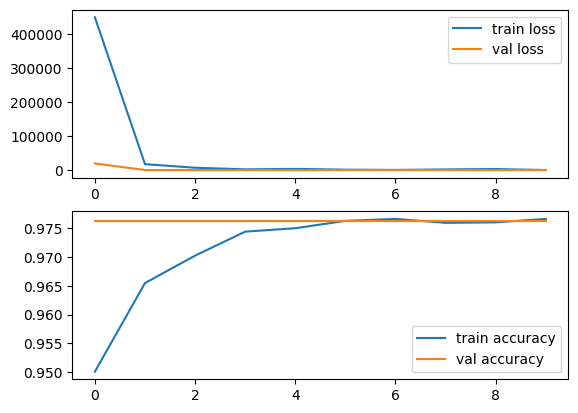

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'])

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy', 'val accuracy'])

Modelo Multicapa

---


In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Cargar el dataset
file_path = '/content/DatasetHomeOffice.csv'  # Cambia según la ruta de tu archivo
data = pd.read_csv(file_path)

In [18]:
# Crear la columna de clasificación basada en el Índice de Temperatura y Humedad (THI)
def classify_thi(temp, humidity):
    # Cálculo simplificado del THI
    thi = temp + 0.555 * (6.11 * (10 ** (7.5 * humidity / (237.7 + humidity))) - 10)
    if thi < 70:
        return 0  # Cómodo
    elif 70 <= thi < 80:
        return 1  # Incómodo
    else:
        return 2  # Peligroso

data['THI_Class'] = data.apply(lambda x: classify_thi(x['Temperatura'], x['Humedad']), axis=1)

In [19]:
print(data['THI_Class'].value_counts())

THI_Class
2    16332
Name: count, dtype: int64


In [20]:
# Separar características y etiquetas
X = data[['Temperatura', 'Humedad']]
y = data['THI_Class']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir las etiquetas a formato categórico
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


In [27]:
from keras.regularizers import l2
# Construcción del modelo MLP
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(3, activation='softmax')  # 3 clases
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy del modelo: {accuracy:.2f}")

# Guardar el modelo entrenado si es necesario
model.save('modelo_clasificacion_microclima.h5')

Epoch 1/10
654/654 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 0.4101 - val_accuracy: 1.0000 - val_loss: 0.0148
Epoch 2/10
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 3/10
654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 7.9884e-04 - val_accuracy: 1.0000 - val_loss: 2.2443e-04
Epoch 4/10
654/654 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 1.7052e-04 - val_accuracy: 1.0000 - val_loss: 7.4463e-05
Epoch 5/10
654/654 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 6.0984e-05 - val_accuracy: 1.0000 - val_loss: 3.3343e-05
Epoch 6/10
654/654 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 2.8494e-05 - val_accuracy: 1.0000 - val_loss: 1.7575e-05
Epoch 7/10
654/654 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 1.5396e-05 - val_accuracy: 1.0000 - val_loss: 1.0200e-05
Epoch 8/10
654/654 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 

Accuracy del modelo: 1.00


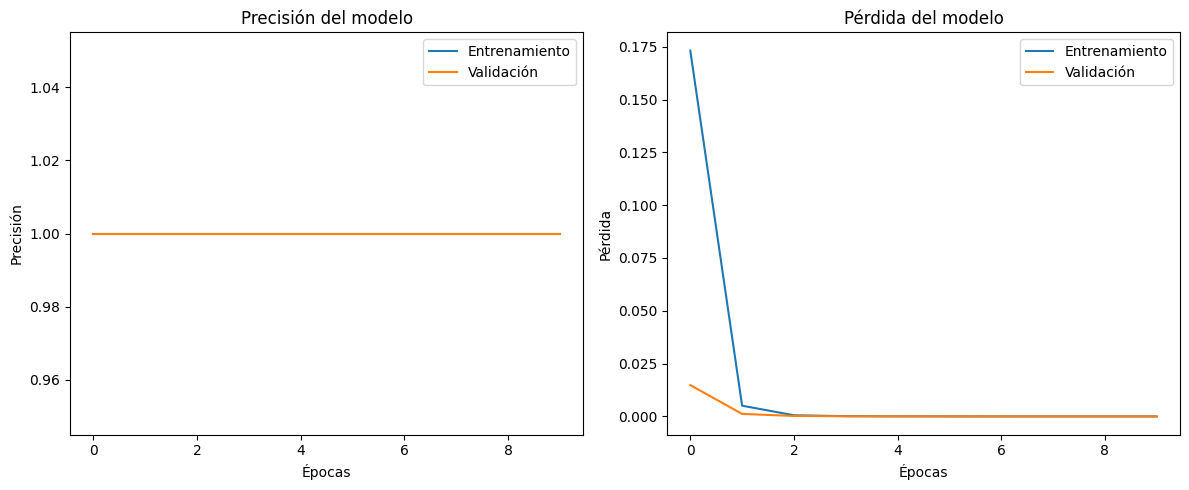

In [32]:
import matplotlib.pyplot as plt
# Graficar los resultados del entrenamiento
plt.figure(figsize=(12, 5))
# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Matriz de predicción y ejemplos
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Mostrar matriz de predicción
print("Ejemplos de predicción:")
for i in range(5):  # Mostrar 5 predicciones
    print(f"Real: {y_test_classes[i]}, Predicción: {y_pred[i]}")

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Ejemplos de predicción:
Real: 2, Predicción: 2
Real: 2, Predicción: 2
Real: 2, Predicción: 2
Real: 2, Predicción: 2
Real: 2, Predicción: 2
